# LAB 4: BÀI THỰC HÀNH CHUẨN BỊ DỮ LIỆU

## PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

### 1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

def load_data(filename):
    return pd.read_csv(filename)

filename = "tidisater.csv"
tidisater = load_data(filename)
print(tidisater.head(10))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

# 2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heatmap). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

In [5]:
dfage = tidisater[tidisater['Age'].isna()]
print(dfage.count())

PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64


In [6]:
dfcabin = tidisater[tidisater['Cabin'].isna()]
print(dfcabin.count())

PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
dtype: int64


In [7]:
dfembarked = tidisater[tidisater['Embarked'].isna()]
print(dfembarked.count())

PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       0
dtype: int64


### Trực quan hóa bằng heatmap

<Axes: >

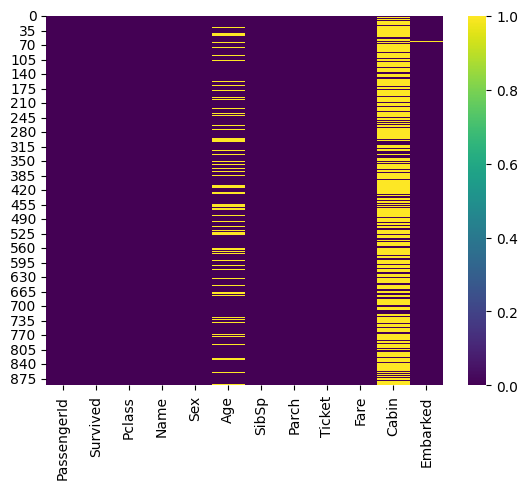

In [8]:
import seaborn as sns
sns.heatmap(tidisater.isna(), cmap='viridis')

# 3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name

In [9]:
tidisater[['firstName','secondName']]=tidisater['Name'].str.split(',',expand=True)
tidisater_splitname = tidisater.drop("Name", axis=1)
tidisater_splitname.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


# 4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F


In [10]:
def substitute_Sex(x_df):
    mapping = {'male':'M', 'female':'F'}
    x_df['Sex'] = x_df['Sex'].map(mapping)
    return x_df

tidisater5 = tidisater_splitname.pipe(substitute_Sex)
tidisater5.head(5)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


# 5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưara quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
### a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phânphối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.


<Axes: xlabel='Pclass', ylabel='Age'>

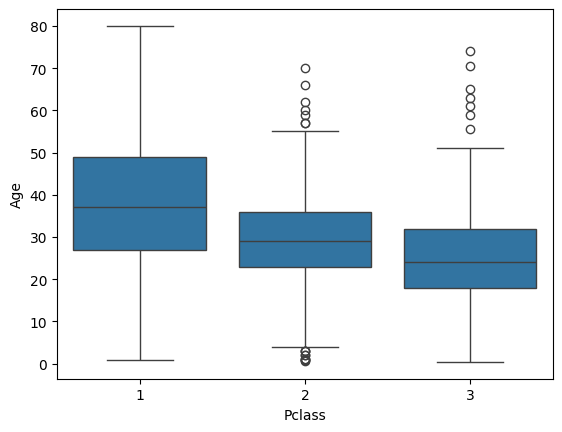

In [11]:
sns.boxplot(y='Age', x='Pclass', data=tidisater5)


### b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map

In [12]:
tidisater5['Age'][tidisater5['Pclass']==1].fillna(tidisater5['Age'][tidisater5['Pclass']==1].median(), inplace=False)
tidisater5['Age'][tidisater5['Pclass']==2].fillna(tidisater5['Age'][tidisater5['Pclass']==2].median(), inplace=False)
tidisater5['Age'][tidisater5['Pclass']==3].fillna(tidisater5['Age'][tidisater5['Pclass']==3].median(), inplace=False)

0      22.0
2      26.0
4      35.0
5      24.0
7       2.0
       ... 
882    22.0
884    25.0
885    39.0
888    24.0
890    32.0
Name: Age, Length: 491, dtype: float64

# 6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [26]:
tidisater5.loc[tidisater5['Age'] <= 12, 'Agegroup'] = 'Kid'
tidisater5.loc[(tidisater5['Age'] > 12) & (tidisater5['Age'] <= 18), 'Agegroup'] = 'Teen'
tidisater5.loc[(tidisater5['Age'] > 18) & (tidisater5['Age'] <= 60), 'Agegroup'] = 'Adult'
tidisater5.loc[tidisater5['Age'] > 60, 'Agegroup'] = 'Older'
tidisater5['Agegroup'] = tidisater5['Agegroup'].fillna('Unknown')
print(tidisater5[['Age', 'Agegroup']].head(10))

    Age Agegroup
0  22.0    Adult
1  38.0    Adult
2  26.0    Adult
3  35.0    Adult
4  35.0    Adult
5   NaN  Unknown
6  54.0    Adult
7   2.0      Kid
8  27.0    Adult
9  14.0     Teen


# 7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi “secondName”


In [15]:
listNamePrefix=[]
for index, row in tidisater5.iterrows():
    vitri = row['secondName'].find(' ')
    secondname = row['secondName'].strip()
    namePrefix=secondname[vitri+1:]
    listNamePrefix.append(namePrefix)

cotNamePrefix=pd.DataFrame(listNamePrefix, columns=['namePrefix'])
tidisater5=pd.concat([tidisater5, cotNamePrefix], axis=1, sort=False)
print(tidisater5)

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F   NaN      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  firstName 

# 8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [27]:
tidisater5['familySize'] = 1 + tidisater5['SibSp'] + tidisater5['Parch']
print("Câu 8 - Kết quả familySize:")
print(tidisater5[['SibSp', 'Parch', 'familySize']].head(5))

Câu 8 - Kết quả familySize:
   SibSp  Parch  familySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


# 9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [28]:
tidisater5['Alone'] = np.where(tidisater5['familySize'] == 1, 1, 0)
print("\nCâu 9 - Kết quả Alone:")
print(tidisater5[['familySize', 'Alone']].head(5))


Câu 9 - Kết quả Alone:
   familySize  Alone
0           2      0
1           2      0
2           1      1
3           2      0
4           1      1


# 10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tínhcabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng “Unknown”

In [29]:
tidisater5['typeCabin'] = tidisater5['Cabin'].fillna('Unknown').str[0]
print("\nCâu 10 - Kết quả typeCabin:")
print(tidisater5[['Cabin', 'typeCabin']].head(5))


Câu 10 - Kết quả typeCabin:
  Cabin typeCabin
0   NaN         U
1   C85         C
2   NaN         U
3  C123         C
4   NaN         U


# 11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện (train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.

In [30]:
print("\nCâu 11 - Trước khi loại bỏ trùng lặp:")
print(f"Số lượng bản ghi: {len(tidisater5)}")
tidisater5_cleaned = tidisater5.drop_duplicates(subset=['PassengerId'], keep='first')
print("Sau khi loại bỏ trùng lặp:")
print(f"Số lượng bản ghi: {len(tidisater5_cleaned)}")
print(tidisater5_cleaned.head(5))


Câu 11 - Trước khi loại bỏ trùng lặp:
Số lượng bản ghi: 891
Sau khi loại bỏ trùng lặp:
Số lượng bản ghi: 891
   PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3   M  22.0      1      0         A/5 21171   
1            2         1       1   F  38.0      1      0          PC 17599   
2            3         1       3   F  26.0      0      0  STON/O2. 3101282   
3            4         1       1   F  35.0      1      0            113803   
4            5         0       3   M  35.0      0      0            373450   

      Fare Cabin Embarked  firstName  \
0   7.2500   NaN        S     Braund   
1  71.2833   C85        C    Cumings   
2   7.9250   NaN        S  Heikkinen   
3  53.1000  C123        S   Futrelle   
4   8.0500   NaN        S      Allen   

                                    secondName  \
0                              Mr. Owen Harris   
1   Mrs. John Bradley (Florence Briggs Thayer)   
2                             